In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df=pd.read_csv('D:/datasets+minipro/Analytics vidhya free course material/Regression/bigmartanalytics.csv')

In [157]:
df1=df.copy()

In [158]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [159]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [160]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [161]:
df=df.copy()
df.drop('Item_Identifier',1,inplace=True)
### Converting Incorrect classes,typos into same class in df.
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

## Before Imputation visualizations:

In [162]:
plt.style.use('seaborn-darkgrid')

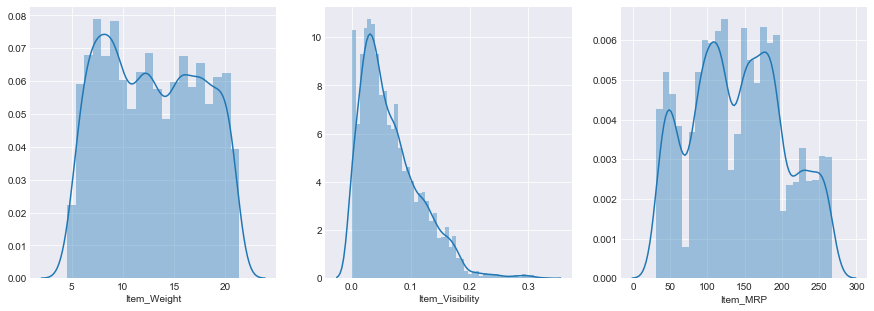

In [163]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.distplot(df['Item_Weight'].dropna(),ax=axes[0])
sns.distplot(df['Item_Visibility'].dropna(),ax=axes[1])
sns.distplot(df['Item_MRP'].dropna(),ax=axes[2])
plt.show()

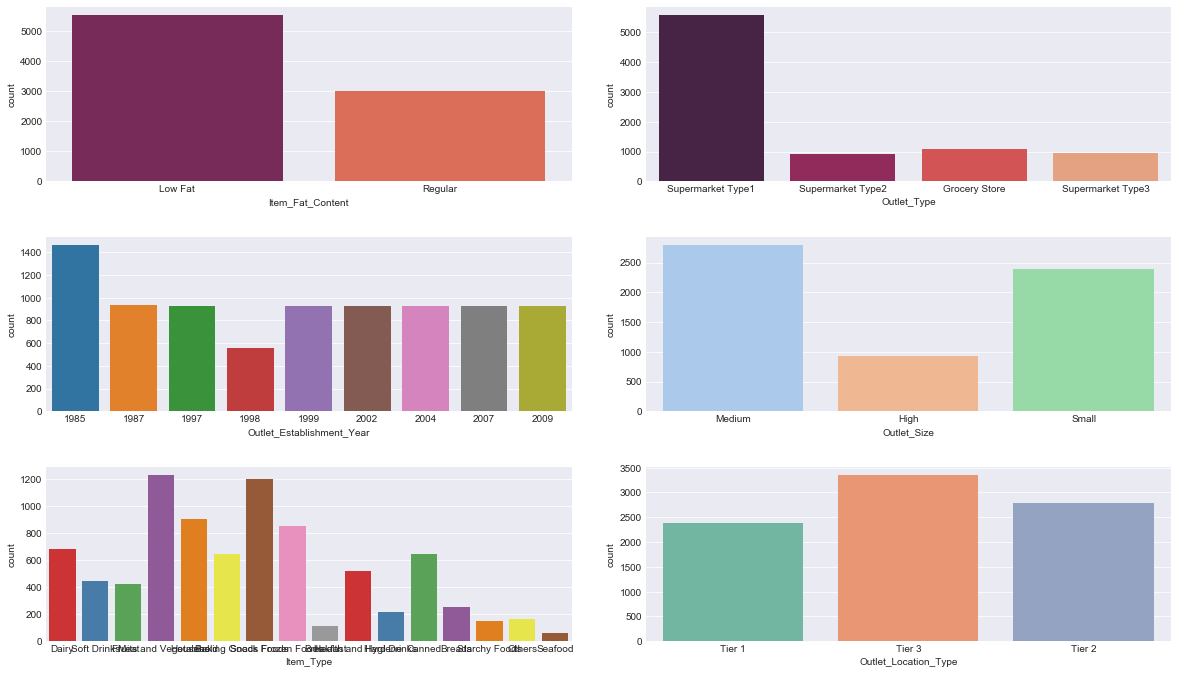

In [164]:
fig,axes=plt.subplots(3,2,figsize=(17,10))
sns.countplot(df['Item_Fat_Content'],ax=axes[0,0], palette="rocket")
sns.countplot(df['Outlet_Type'],ax=axes[0,1], palette="rocket")
sns.countplot(df['Outlet_Establishment_Year'],ax=axes[1,0])
sns.countplot(df['Outlet_Size'],ax=axes[1,1], palette="pastel")
sns.countplot(df['Item_Type'],ax=axes[2,0], palette="Set1")
sns.countplot(df['Outlet_Location_Type'],ax=axes[2,1], palette="Set2")
plt.tight_layout(pad=3)
plt.show()
# palette=rocket,pastel,deep,Set3,RdPu,RdBu,Set2

In [165]:
# sns.countplot(df['Destination_Type'],hue=df['Gender'])
# plt.show()
a=pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Size'])
b=pd.crosstab(df['Outlet_Establishment_Year'],df['Outlet_Size'])
c=pd.crosstab(df['Outlet_Type'],df['Item_Fat_Content'])

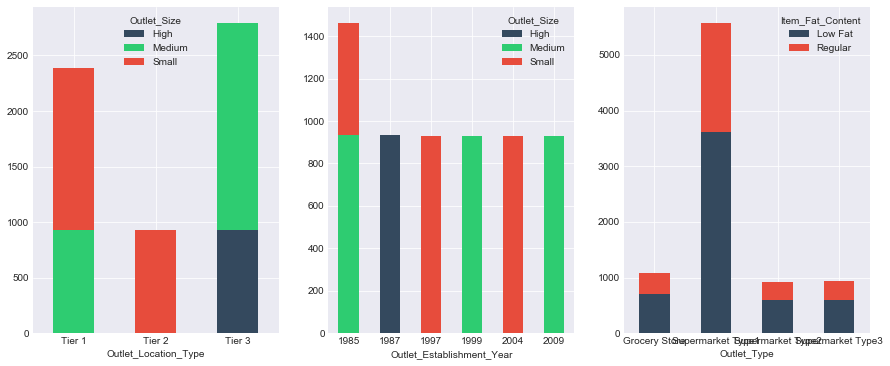

In [166]:
fig,axes=plt.subplots(1,3,figsize=(15,6))
a.plot(kind='bar',rot=0,stacked=True,ax=axes[0],color=["#34495e","#2ecc71","#e74c3c"])
b.plot(kind='bar',rot=0,stacked=True,ax=axes[1],color=["#34495e","#2ecc71","#e74c3c"])
c.plot(kind='bar',rot=0,stacked=True,ax=axes[2],color=["#34495e","#e74c3c"])
plt.show()
# color_map = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
# Customer_Since_Months	Customer using cab services since n months; 0 month means current month
# Cancellation_Last_1Month	Number of trips cancelled by the customer in last 1 month

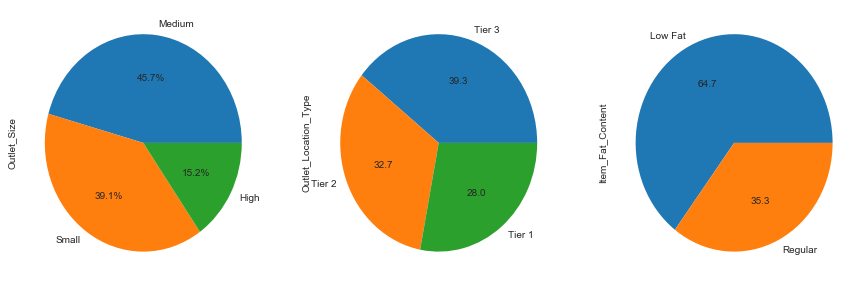

In [167]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
df['Outlet_Size'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0])
df['Outlet_Location_Type'].value_counts().plot(kind='pie',autopct='%1.1f',ax=axes[1])
df['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%1.1f',ax=axes[2])
plt.show()

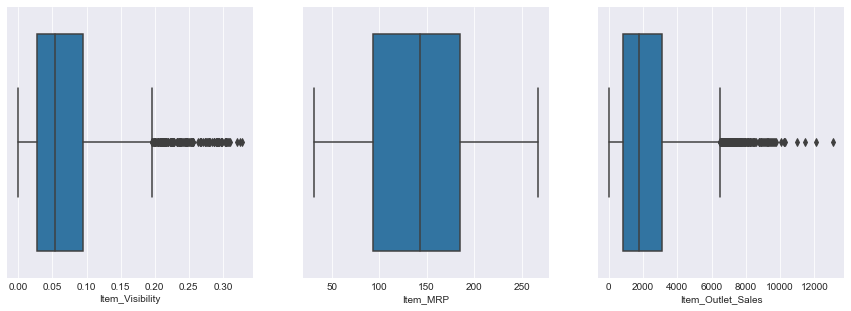

In [168]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['Item_Visibility'],ax=axes[0])
sns.boxplot(df['Item_MRP'],ax=axes[1])
sns.boxplot(df['Item_Outlet_Sales'],ax=axes[2]) # target variable.
plt.show()

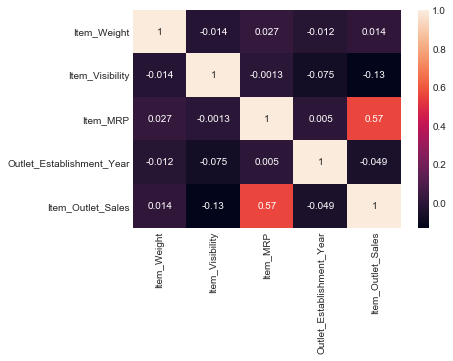

In [169]:
sns.heatmap(df.corr(),annot=True)

## After imputations:

In [178]:
df1=df.copy()
### Converting Incorrect classes,typos into same class in df1.
df1['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
## Label encoding
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')
sicate=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in df1.select_dtypes(include='object'):
    if df1[i].isnull().sum()>0:
        df1[i]=sicate.fit_transform(np.array(df1[i]).reshape(-1,1))
for i in df1.select_dtypes(exclude='object'):
    if df1[i].isnull().sum()>0:
        df1[i]=si.fit_transform(np.array(df1[i]).reshape(-1,1))
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# for i in df1.select_dtypes(include='object'):
#     df1[i]=le.fit_transform(df1[i])

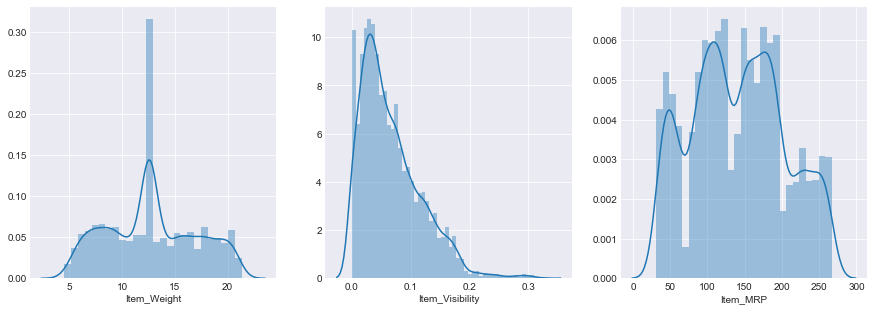

In [179]:
plt.style.use('seaborn-darkgrid')

fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.distplot(df1['Item_Weight'].dropna(),ax=axes[0])
sns.distplot(df1['Item_Visibility'].dropna(),ax=axes[1])
sns.distplot(df1['Item_MRP'].dropna(),ax=axes[2])
plt.show()

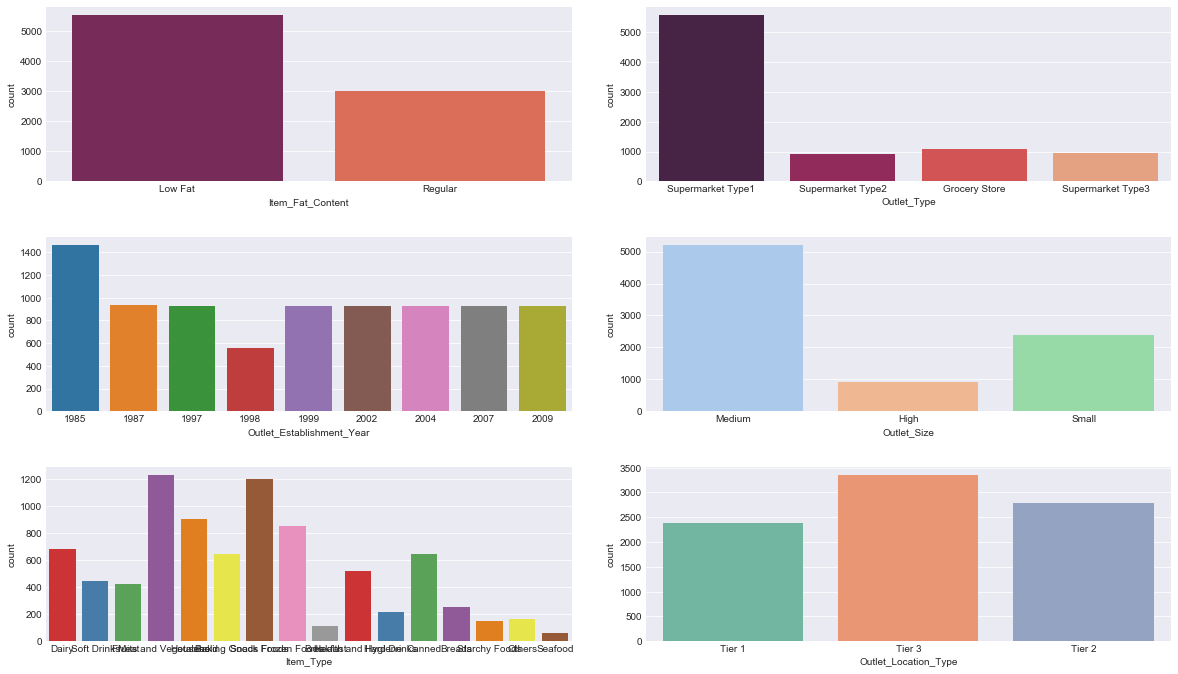

In [180]:
fig,axes=plt.subplots(3,2,figsize=(17,10))
sns.countplot(df1['Item_Fat_Content'],ax=axes[0,0], palette="rocket")
sns.countplot(df1['Outlet_Type'],ax=axes[0,1], palette="rocket")
sns.countplot(df1['Outlet_Establishment_Year'],ax=axes[1,0])
sns.countplot(df1['Outlet_Size'],ax=axes[1,1], palette="pastel")
sns.countplot(df1['Item_Type'],ax=axes[2,0], palette="Set1")
sns.countplot(df1['Outlet_Location_Type'],ax=axes[2,1], palette="Set2")
plt.tight_layout(pad=3)
plt.show()
# palette=rocket,pastel,deep,Set3,RdPu,RdBu,Set2

In [181]:
# sns.countplot(df1['Destination_Type'],hue=df1['Gender'])
# plt.show()
a=pd.crosstab(df1['Outlet_Location_Type'],df1['Outlet_Size'])
b=pd.crosstab(df1['Outlet_Establishment_Year'],df1['Outlet_Size'])
c=pd.crosstab(df1['Outlet_Type'],df1['Item_Fat_Content'])

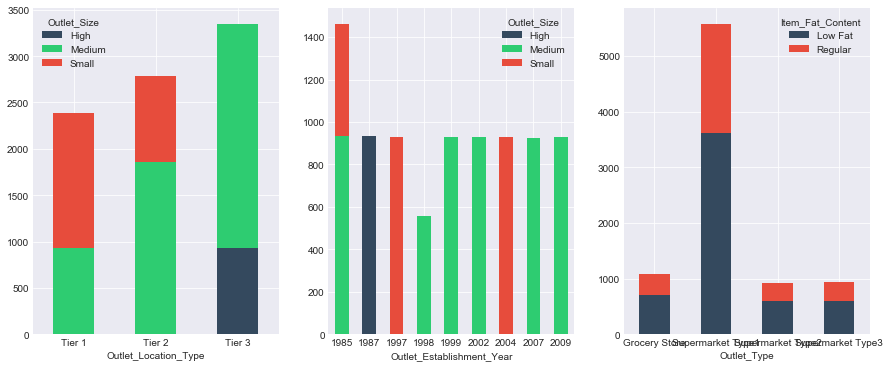

In [188]:
fig,axes=plt.subplots(1,3,figsize=(15,6))
a.plot(kind='bar',rot=0,stacked=True,ax=axes[0],color=["#34495e","#2ecc71","#e74c3c"])
b.plot(kind='bar',rot=0,stacked=True,ax=axes[1],color=["#34495e","#2ecc71","#e74c3c"])
c.plot(kind='bar',rot=0,stacked=True,ax=axes[2],color=["#34495e","#e74c3c"])
plt.show()
# color_map = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
# Customer_Since_Months	Customer using cab services since n months; 0 month means current month
# Cancellation_Last_1Month	Number of trips cancelled by the customer in last 1 month

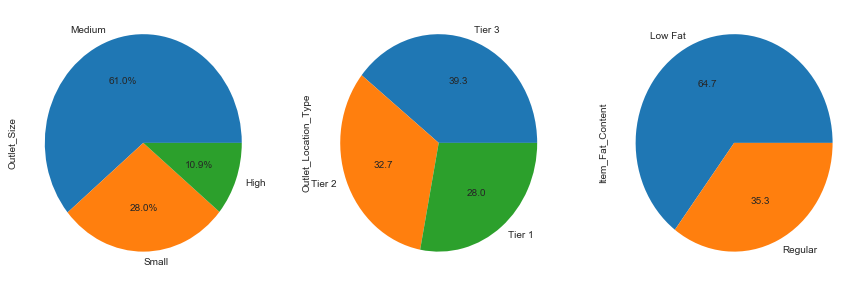

In [183]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
df1['Outlet_Size'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=axes[0])
df1['Outlet_Location_Type'].value_counts().plot(kind='pie',autopct='%1.1f',ax=axes[1])
df1['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%1.1f',ax=axes[2])
plt.show()

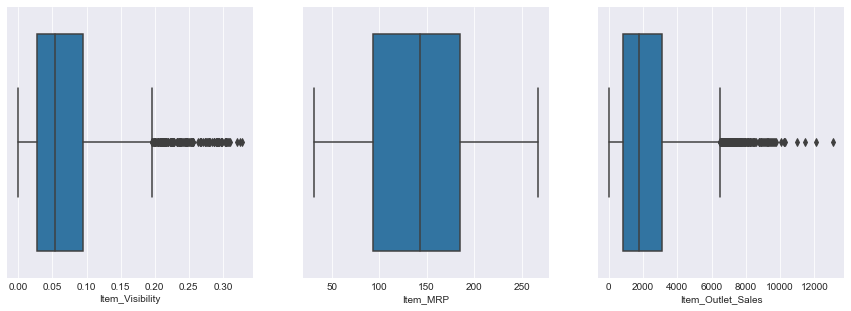

In [185]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df1['Item_Visibility'],ax=axes[0])
sns.boxplot(df1['Item_MRP'],ax=axes[1])
sns.boxplot(df1['Item_Outlet_Sales'],ax=axes[2]) # target variable.
plt.show()

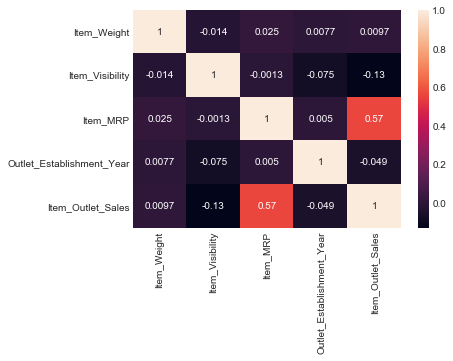

In [186]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Statistical analytis:

In [189]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [194]:
df[['Item_Outlet_Sales','Outlet_Type']].head(5)

,Item_Outlet_Sales,Outlet_Type
0,3735.1380,Supermarket Type1
1,443.4228,Supermarket Type2
2,2097.2700,Supermarket Type1
3,732.3800,Grocery Store
4,994.7052,Supermarket Type1


In [199]:
# Numerical vs categorical:[Anova test]

In [200]:
import scipy.stats as st

In [201]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [208]:
    print(st.f_oneway(df[df['Outlet_Type']==i]['Item_Outlet_Sales']))

F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=nan, pvalue=nan)
F_onewayResult(statistic=nan, pvalue=nan)


In [209]:
x=df[df['Outlet_Type']=='Supermarket Type1']['Item_Outlet_Sales']
y=df[df['Outlet_Type']=='Supermarket Type2']['Item_Outlet_Sales']
z=df[df['Outlet_Type']=='Supermarket Type3']['Item_Outlet_Sales']
w=df[df['Outlet_Type']=='Grocery Store']['Item_Outlet_Sales']

In [210]:
st.f_oneway(x,y,z,w)

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

### Category v category : chi_square

In [211]:
df[['Outlet_Size','Outlet_Type']].head(5)

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,NaN,Grocery Store
4,High,Supermarket Type1


In [216]:
table=pd.crosstab(df['Outlet_Size'].dropna(),df['Outlet_Type'].dropna())

In [217]:
st.chi2_contingency(table)

(3734.8614622253567,
 0.0,
 6,
 array([[  80.49991821,  567.46343857,  141.48470473,  142.55193849],
        [ 241.24063471, 1700.56371667,  423.99869131,  427.1969573 ],
        [ 206.25944708, 1453.97284476,  362.51660396,  365.2511042 ]]))

In [218]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [227]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [230]:
x=np.array(df[df['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales'])
y=np.array(df[df['Item_Fat_Content']=='Regular']['Item_Outlet_Sales'])

In [231]:
st.ttest_ind(x,y)

Ttest_indResult(statistic=-1.7281968320065053, pvalue=0.0839891696767391)

In [ ]:
H0-There is an impact of item fat content on item outlet sales
HA-There is no impact of item fat content on item outlet sales
# p value less than alpha so we reject null hypothesis.
# so there is no impact of fat content on target variable.t